In [10]:
from deepface import DeepFace
import os
from os import path
from itertools import combinations
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json

In [38]:
img1 = plt.imread('images/1/110.png')
img2 = plt.imread('images/1/110.png')

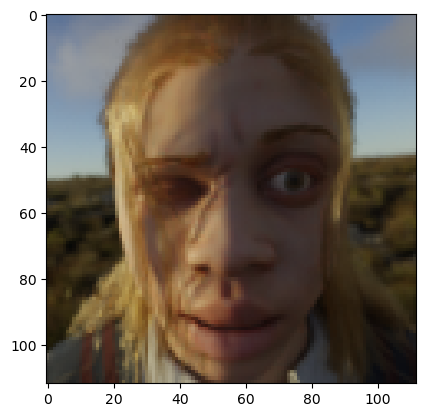

In [39]:
plt.imshow(img1)

In [41]:
result = DeepFace.verify(
    img1_path = "images/1/108.png",
    img2_path = "images/1/110.png",
    enforce_detection=False)

print(result)

{'verified': True, 'distance': 0.543945069351593, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 9, 'y': 13, 'w': 96, 'h': 96, 'left_eye': (71, 51), 'right_eye': (36, 51)}, 'img2': {'x': 0, 'y': 0, 'w': 111, 'h': 111, 'left_eye': None, 'right_eye': None}}, 'time': 3.52}


In [5]:
# Renaming files inside of image folder

folder_path = 'images/3'

files = os.listdir(folder_path)
image_files = [f for f in files if f.lower().endswith('.png')]
image_files.sort()

# Rename files sequentially
for index, file_name in enumerate(image_files, start=124):
    old_path = os.path.join(folder_path, file_name)
    new_path = os.path.join(folder_path, f"{index}.png")
    os.rename(old_path, new_path)

TPR = TP/(TP+FN)

In [ ]:
# directory containing images
folder_path = 'images/1'
# get the image files from the folder
image_files = sorted(os.listdir(folder_path))

# Generate all possible pairs (k(k-1)/2) using combinatations 
image_pairs = list(combinations(image_files, 2))

# Track TPs and FNs (append into list later)
TP = 0 
FN = 0  

for img1, img2 in image_pairs:
    img1_path = os.path.join(folder_path, img1)
    img2_path = os.path.join(folder_path, img2)
    #print(img1_path, img2_path)
    result = DeepFace.verify(
        img1_path,
        img2_path,
        enforce_detection=False
    )
    
    is_match = result["verified"]
    print(f"Input pair: {img1} and {img2}: {is_match}")

    if is_match:
        TP += 1  # Correctly matched
    else:
        FN += 1  # Incorrectly matched

# Calculate TPR
TPR = TP / (TP + FN)
# Caculate FNR
FNR = 1-TPR
print(f"\n (FNR): {1-TPR:.2%}")

# takes around 9 seconds for 8 individuals (28 input pairs)

images/1\108.png images/1\109.png
Input pair: 108.png and 109.png: True
images/1\108.png images/1\110.png
Input pair: 108.png and 110.png: True
images/1\108.png images/1\111.png
Input pair: 108.png and 111.png: True
images/1\108.png images/1\112.png
Input pair: 108.png and 112.png: True
images/1\108.png images/1\113.png
Input pair: 108.png and 113.png: True
images/1\108.png images/1\114.png
Input pair: 108.png and 114.png: True
images/1\108.png images/1\115.png
Input pair: 108.png and 115.png: True
images/1\109.png images/1\110.png
Input pair: 109.png and 110.png: True
images/1\109.png images/1\111.png
Input pair: 109.png and 111.png: True
images/1\109.png images/1\112.png
Input pair: 109.png and 112.png: True
images/1\109.png images/1\113.png
Input pair: 109.png and 113.png: True
images/1\109.png images/1\114.png
Input pair: 109.png and 114.png: True
images/1\109.png images/1\115.png
Input pair: 109.png and 115.png: True
images/1\110.png images/1\111.png
Input pair: 110.png and 111.pn

Looping this over all subfolders

In [51]:
main_dir = "images"

# file names for individuals ['0', '1'] etc
individual_dir = [f.name for f in os.scandir(main_dir) if f.is_dir()]

results = {}

# loop over each individual in each folder
for idx in individual_dir:
    folder_path = os.path.join(main_dir, idx)

    # get image files
    image_files = sorted(os.listdir(folder_path))

    # get combinatations
    image_pairs = list(combinations(image_files, 2))

    TP = 0
    FN = 0

    for img1, img2 in image_pairs:
        result = DeepFace.verify(
            img1_path = os.path.join(folder_path, img1),
            img2_path = os.path.join(folder_path, img2),
            enforce_detection=False
        )

        is_match = result['verified']

        if is_match:
            TP += 1
        else:
            FN += 1
    
    TPR = TP / (TP + FN)
    FNR = 1 - TPR
    results[idx] = FNR

avg_FNR = np.mean(list(results.values()))
results["mean_FNR"] = avg_FNR

for idx, fnr in results.items():
    print(f'FNR for individual {idx} is: {fnr:.2%}')

print(f'Mean FNR across all individuals in group {main_dir}: {avg_FNR:.2%}')



FNR for individual 0 is: 3.57%
FNR for individual 1 is: 0.00%
FNR for individual 2 is: 60.71%
FNR for individual 3 is: 0.00%
FNR for individual mean_FNR is: 16.07%
Mean FNR across all individuals in group images: 16.07%


Appending to JSON file